# Predicting Solar Generation from Weather Forecasts Using Machine Learning

In [1]:
# Basic Data Science Packages
import numpy as np
import pandas as pd

#ML scikit learn SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
#Plotting graph
import matplotlib.pyplot as plt

#Normalization of data
from sklearn.preprocessing import StandardScaler

#Utility Module for computing and displaying metrics
from utility_functions import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
thesis_dataset = pd.read_csv('data/final_thesis_dataset.csv',parse_dates=[0], index_col=0)

train = thesis_dataset[:6098] 
test = thesis_dataset[6098:] 

X_solar_train = train[['SWTDN', 'SWGDN', 'T']]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[['SWTDN', 'SWGDN', 'T']]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[['v1', 'v2', 'v_50m', 'z0']]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[['v1', 'v2', 'v_50m', 'z0']]
y_wind_test = test['DE_wind_generation_actual']

In [8]:
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, return_train_score=True)
  
# fitting the model for grid search
grid.fit(X_solar_train, y_solar_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=0.1, kernel=rbf, score=(train=-0.328, test=0.073), total=   1.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=(train=-0.371, test=-0.271), total=   1.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=(train=-0.355, test=-0.567), total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=(train=-0.337, test=-0.685), total=   1.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=(train=-0.339, test=-0.546), total=   1.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=-0.319, test=0.213), total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=-0.311, test=-0.196), total=   1.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=-0.274, test=-0.477), total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=(train=-0.242, test=-0.576), tota

[CV]  C=100, gamma=0.0001, kernel=rbf, score=(train=0.941, test=0.779), total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=(train=0.944, test=0.918), total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=(train=0.935, test=0.909), total=   1.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=(train=0.929, test=0.867), total=   1.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=(train=0.922, test=0.909), total=   1.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=(train=0.578, test=-1.982), total=   8.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=(train=0.526, te

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished


Wall time: 4min 1s


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [4]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=1000, gamma=0.0001)


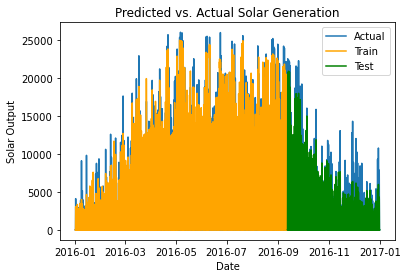

In [5]:
train_solar_pred = grid.predict(X_solar_train)
test_solar_pred = grid.predict(X_solar_test)

df = thesis_dataset[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation")
plt.show()

In [7]:
metrics('svm+rbf', test[['DE_solar_generation_actual']], test_solar_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
svm+rbf,496.981448,1145.784358,33.849437,3.521922,0.921213
